## Exercise: Pandas & NumPy with Student Performance Dataset
## Exercise: Pandas & NumPy with Student Performance Dataset

You are provided with three separate datasets, all originally derived from a single dataset. However, these datasets have undergone slight modifications through different processes. Your task is to analyze the datasets, identify the differences, and correctly merge them back together.

**Important Notes**:
- Some column names have been changed and need to be translated back.
- Certain categorical variables have altered values (e.g., some categories have been renamed).
- Check the distribution of numerical variables, as there may be discrepancies.
- Missing values are present in multiple columns and need to be imputed appropriately. Justify your choice of imputation method.
- Some columns have been stored in different data types (e.g., numbers as strings). Ensure that data types are correct before merging the datasets.

Your Task:
1. Load all three datasets into Python.
2. Identify differences and discrepancies between the datasets.
3. Reconstruct the original dataset by:
    - Adjusting column names and data types.
    - Correctly merging the datasets.
    - Handling missing values (imputation) and justifying your chosen method.
4. Save the final dataset as Merged_StudentData.csv.
5. Perform hypothesis tests to analyze relationships between the following variables: `Sleep_Hours`, `Exam_Score`, `Internet_Access`, `Hours_Studied`, and `Tutoring_Sessions`.

In [321]:
import pandas as pd
df1 = pd.read_csv("Student Data Part 1 mv.csv")
df2 = pd.read_csv("Student Data Part 2 mv.csv")
df3 = pd.read_csv("Student Data Part 3 mv.csv")

In [322]:
df1

,Student_ID,Study_Hours,Attendance,Rest_Hours,Parental_Involvement,Access_to_Resources
0,1,23,84,8.0,Low,High
1,2,19,64,9.0,Low,Medium
2,3,24,98,8.0,Medium,Medium
3,4,29,89,9.0,Low,Medium
4,5,19,92,7.0,Medium,Medium
...,...,...,...,...,...,...
6602,6603,25,69,8.0,High,Medium
6603,6604,23,76,9.0,High,Medium
6604,6605,20,90,7.0,Medium,Low
6605,6606,10,86,7.0,High,High


In [323]:
print(df1.info())
print(df2.info())
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            6607 non-null   int64  
 1   Study_Hours           6607 non-null   int64  
 2   Attendance            6607 non-null   int64  
 3   Rest_Hours            6277 non-null   float64
 4   Parental_Involvement  6607 non-null   object 
 5   Access_to_Resources   6607 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 309.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5616 non-null   int64  
 1   Student_ID         5616 non-null   int64  
 2   Internet_Access    5335 non-null   object 
 3   Tutoring_Sessions  5335 non-null   float64
 4   Family_Income     

Student_data1

Changing the data types

In [324]:
df1['Student_ID'] = df1['Student_ID'].astype("string")

In [325]:
df1.Access_to_Resources = pd.Categorical(df1.Access_to_Resources,["Low","Medium","High"],ordered=True)

In [326]:
df1.Parental_Involvement = pd.Categorical(df1.Parental_Involvement,["Low","Medium","High"],ordered=True)

In [327]:
print(df1.dtypes)

Student_ID              string[python]
Study_Hours                      int64
Attendance                       int64
Rest_Hours                     float64
Parental_Involvement          category
Access_to_Resources           category
dtype: object


Renaming the columns

In [328]:
df1 = df1.rename(columns={"Study_Hours": "Hours_studied","Rest_Hours": "Sleep_hours","Parental_Involvement":"Parental_Support","Access_to_Resources":"Resources_access"})

student_data2

In [329]:
df2.set_index("Unnamed: 0", inplace=True)
df2.index.name = None
df2.sort_index(inplace=True)

changing the data types

In [330]:
df2['Student_ID'] = df2['Student_ID'].astype("string")

In [331]:
df2.Internet_Access = pd.Categorical(df2.Internet_Access,["Available","Unavailable"],ordered=False)

In [332]:
df2.Family_Income = pd.Categorical(df2.Family_Income,["Low","Medium","High"],ordered=True)

In [333]:
df2.Teacher_Quality = pd.Categorical(df2.Teacher_Quality,["Low","Medium","High"],ordered=True)

In [334]:
df2.School_Type = pd.Categorical(df2.School_Type,["Public","Private"],ordered=False)

In [335]:
df2.dtypes

Student_ID           string[python]
Internet_Access            category
Tutoring_Sessions           float64
Family_Income              category
Teacher_Quality            category
School_Type                category
dtype: object

In [336]:
df2.rename(columns={"Tutoring_Sessions":"Tutoring_hours"})

,Student_ID,Internet_Access,Tutoring_hours,Family_Income,Teacher_Quality,School_Type
0,1,Available,0.0,Low,Medium,Public
1,2,Available,2.0,Medium,Medium,Public
2,3,Available,2.0,Medium,Medium,Public
3,4,Available,1.0,Medium,Medium,Public
5,6,Available,3.0,Medium,Medium,Public
...,...,...,...,...,...,...
6602,6603,Available,1.0,High,Medium,Public
6603,6604,Available,3.0,Low,High,Public
6604,6605,Available,3.0,Low,Medium,Public
6605,6606,Available,2.0,Low,Medium,Private


student_data3

changing the data types

In [337]:
df3['Student_ID'] = df3['Student_ID'].astype("string")

In [338]:
df3.Gender = pd.Categorical(df3.Gender,["Male","Female"],ordered=False)

In [339]:
df3.Parental_Education_Level = pd.Categorical(df3.Parental_Education_Level,["High School","College","Postgraduate"],ordered=True)

In [340]:
df3.Distance_from_Home = pd.Categorical(df3.Distance_from_Home,["Close","Medium","Distant"],ordered=True)

Renaming the columns

In [341]:
df3 = df3.rename(columns={"Final_Score": "Exam_score","Parental_Education_Level":"Parental_Education","Distance from Home":"Commute_Distance"})

Joining the data

In [342]:
df_merged = df1.merge(df2, on="Student_ID", how="left")
df_merged

,Student_ID,Hours_studied,Attendance,Sleep_hours,Parental_Support,Resources_access,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type
0,1,23,84,8.0,Low,High,Available,0.0,Low,Medium,Public
1,2,19,64,9.0,Low,Medium,Available,2.0,Medium,Medium,Public
2,3,24,98,8.0,Medium,Medium,Available,2.0,Medium,Medium,Public
3,4,29,89,9.0,Low,Medium,Available,1.0,Medium,Medium,Public
4,5,19,92,7.0,Medium,Medium,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6602,6603,25,69,8.0,High,Medium,Available,1.0,High,Medium,Public
6603,6604,23,76,9.0,High,Medium,Available,3.0,Low,High,Public
6604,6605,20,90,7.0,Medium,Low,Available,3.0,Low,Medium,Public
6605,6606,10,86,7.0,High,High,Available,2.0,Low,Medium,Private


In [343]:
df_merged

,Student_ID,Hours_studied,Attendance,Sleep_hours,Parental_Support,Resources_access,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type
0,1,23,84,8.0,Low,High,Available,0.0,Low,Medium,Public
1,2,19,64,9.0,Low,Medium,Available,2.0,Medium,Medium,Public
2,3,24,98,8.0,Medium,Medium,Available,2.0,Medium,Medium,Public
3,4,29,89,9.0,Low,Medium,Available,1.0,Medium,Medium,Public
4,5,19,92,7.0,Medium,Medium,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6602,6603,25,69,8.0,High,Medium,Available,1.0,High,Medium,Public
6603,6604,23,76,9.0,High,Medium,Available,3.0,Low,High,Public
6604,6605,20,90,7.0,Medium,Low,Available,3.0,Low,Medium,Public
6605,6606,10,86,7.0,High,High,Available,2.0,Low,Medium,Private


In [344]:
merged_student_data1_df = df_merged.merge(df3, on="Student_ID", how="left")

In [345]:
merged_student_data1_df.columns

Index(['Student_ID', 'Hours_studied', 'Attendance', 'Sleep_hours',
       'Parental_Support', 'Resources_access', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Exam_score', 'Parental_Education', 'Distance_from_Home', 'Gender'],
      dtype='object')

In [346]:
merged_student_data1_df

,Student_ID,Hours_studied,Attendance,Sleep_hours,Parental_Support,Resources_access,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Exam_score,Parental_Education,Distance_from_Home,Gender
0,1,23,84,8.0,Low,High,Available,0.0,Low,Medium,Public,65.0,High School,Close,Male
1,2,19,64,9.0,Low,Medium,Available,2.0,Medium,Medium,Public,59.0,College,Medium,Female
2,3,24,98,8.0,Medium,Medium,Available,2.0,Medium,Medium,Public,72.0,Postgraduate,Close,Male
3,4,29,89,9.0,Low,Medium,Available,1.0,Medium,Medium,Public,69.0,High School,Medium,Male
4,5,19,92,7.0,Medium,Medium,NaN,NaN,NaN,NaN,NaN,68.0,College,Close,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,6603,25,69,8.0,High,Medium,Available,1.0,High,Medium,Public,66.0,High School,Close,Female
6603,6604,23,76,9.0,High,Medium,Available,3.0,Low,High,Public,67.0,High School,Close,Female
6604,6605,20,90,7.0,Medium,Low,Available,3.0,Low,Medium,Public,66.0,Postgraduate,Close,Female
6605,6606,10,86,7.0,High,High,Available,2.0,Low,Medium,Private,66.0,High School,Distant,Female


In [347]:
merged_student_data1_df.isnull().sum()

Student_ID               0
Hours_studied            0
Attendance               0
Sleep_hours            330
Parental_Support         0
Resources_access         0
Internet_Access       1272
Tutoring_Sessions     1272
Family_Income          991
Teacher_Quality       1057
School_Type            991
Exam_score             330
Parental_Education      90
Distance_from_Home      67
Gender                   0
dtype: int64

In [377]:
merged_student_data1_df.to_csv("merged_student_data1.csv", index=False)

In [349]:
merged_student_data1_df

,Student_ID,Hours_studied,Attendance,Sleep_hours,Parental_Support,Resources_access,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Exam_score,Parental_Education,Distance_from_Home,Gender
0,1,23,84,8.0,Low,High,Available,0.0,Low,Medium,Public,65.0,High School,Close,Male
1,2,19,64,9.0,Low,Medium,Available,2.0,Medium,Medium,Public,59.0,College,Medium,Female
2,3,24,98,8.0,Medium,Medium,Available,2.0,Medium,Medium,Public,72.0,Postgraduate,Close,Male
3,4,29,89,9.0,Low,Medium,Available,1.0,Medium,Medium,Public,69.0,High School,Medium,Male
4,5,19,92,7.0,Medium,Medium,NaN,NaN,NaN,NaN,NaN,68.0,College,Close,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,6603,25,69,8.0,High,Medium,Available,1.0,High,Medium,Public,66.0,High School,Close,Female
6603,6604,23,76,9.0,High,Medium,Available,3.0,Low,High,Public,67.0,High School,Close,Female
6604,6605,20,90,7.0,Medium,Low,Available,3.0,Low,Medium,Public,66.0,Postgraduate,Close,Female
6605,6606,10,86,7.0,High,High,Available,2.0,Low,Medium,Private,66.0,High School,Distant,Female


counting the missing values

In [350]:
missing_percent =merged_student_data1_df.isnull().sum() / len(merged_student_data_df) * 100
print(missing_percent)

Student_ID                 0.0
Hours_studied              0.0
Attendance                 0.0
Sleep_hours            33000.0
Parental_Support           0.0
Resources_access           0.0
Internet_Access       127200.0
Tutoring_Sessions     127200.0
Family_Income          99100.0
Teacher_Quality       105700.0
School_Type            99100.0
Exam_score             33000.0
Parental_Education      9000.0
Distance_from_Home      6700.0
Gender                     0.0
dtype: float64


Visualize the missing data

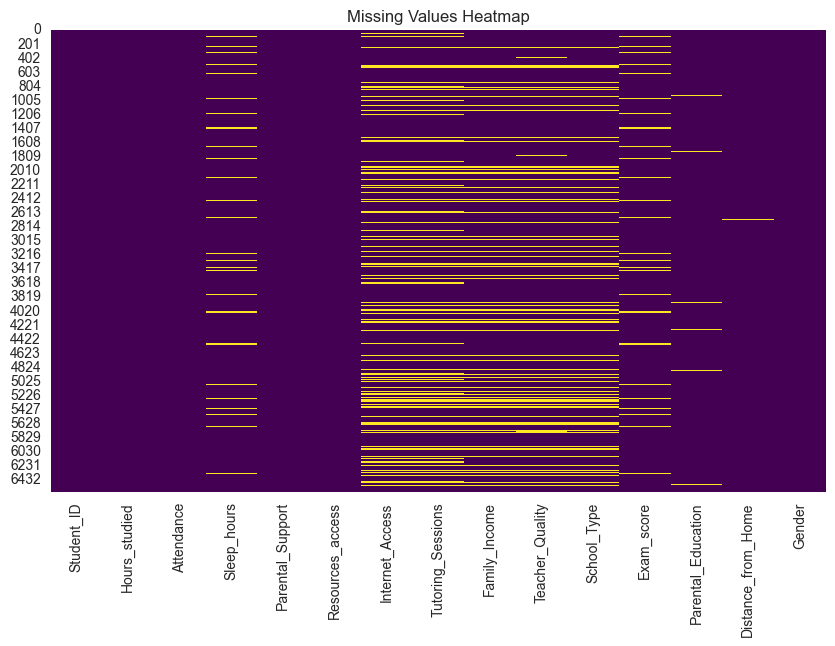

In [351]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(merged_student_data1_df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

Handling the missing values for sleep hours by mean imputation since the distribution is normal and the percentage of missing is less than 5%

In [353]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy='mean')

merged_student_data1_df[['Sleep_hours']] = imputer.fit_transform(merged_student_data1_df[['Sleep_hours']])

Handling the missing values for Exam score by median imputation.since the distribution is skewed and missingness is less than 5%

In [354]:
imputer = SimpleImputer(strategy='median')

merged_student_data1_df[['Exam_score']] = imputer.fit_transform(merged_student_data1_df[['Exam_score']])

In [355]:
print(merged_student_data1_df.isnull().sum())

Student_ID               0
Hours_studied            0
Attendance               0
Sleep_hours              0
Parental_Support         0
Resources_access         0
Internet_Access       1272
Tutoring_Sessions     1272
Family_Income          991
Teacher_Quality       1057
School_Type            991
Exam_score               0
Parental_Education      90
Distance_from_Home      67
Gender                   0
dtype: int64


In [356]:
categorical_vars = ["Internet_Access","Tutoring_Sessions","Family_Income","School_Type","Teacher_Quality","Distance_from_Home","Parental_Education","Gender","Parental_Support","Resources_access"]

For other categorical variables I use mode as method of imputation

In [358]:
for col in categorical_vars:
  merged_student_data1_df[col] = merged_student_data1_df[col].fillna(merged_student_data1_df[col].mode()[0])


In [359]:
merged_student_data1_df.isnull().sum()

Student_ID            0
Hours_studied         0
Attendance            0
Sleep_hours           0
Parental_Support      0
Resources_access      0
Internet_Access       0
Tutoring_Sessions     0
Family_Income         0
Teacher_Quality       0
School_Type           0
Exam_score            0
Parental_Education    0
Distance_from_Home    0
Gender                0
dtype: int64

In [360]:
merged_student_data1_df.dtypes

Student_ID            string[python]
Hours_studied                  int64
Attendance                     int64
Sleep_hours                  float64
Parental_Support            category
Resources_access            category
Internet_Access             category
Tutoring_Sessions            float64
Family_Income               category
Teacher_Quality             category
School_Type                 category
Exam_score                   float64
Parental_Education          category
Distance_from_Home          category
Gender                      category
dtype: object

### Hypotheses testing

Hypothesis 1: There is a positive correlation between the number of hours of sleep (Sleep_Hours) and the exam grade (Exam_Score).
- Remove potential outliers (e.g. students who sleep extremely little or extremely much, i.e. top and bottom 3 %).
- First check whether the variables are normally distributed. If not, apply Spearman correlation.

In [362]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [363]:
# Removing the potential outliers
lower_bound = merged_student_data1_df["Sleep_hours"].quantile(0.03)
upper_bound = merged_student_data1_df["Sleep_hours"].quantile(0.97)
merged_student_data1_df= merged_student_data1_df[(merged_student_data1_df['Sleep_hours'] >= lower_bound) & (merged_student_data1_df['Sleep_hours'] <= upper_bound)]

Text(0.5, 1.0, 'Histogram of Sleep hours')

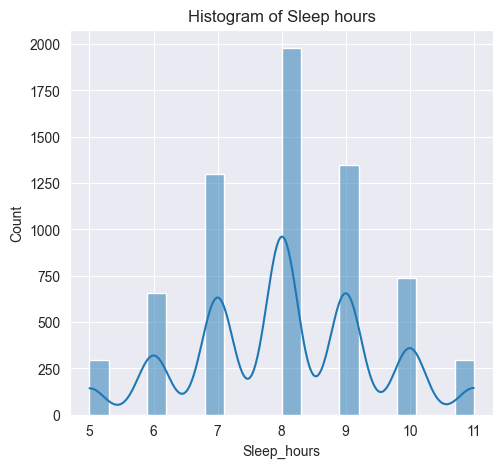

In [364]:
#Checking the normality
plt.figure(figsize=(12,5))
#Sleep Hours Distribution
plt.subplot(1,2,1)
sns.histplot(merged_student_data1_df["Sleep_hours"],kde=True,bins=20)
plt.title("Histogram of Sleep hours")

Text(0.5, 1.0, 'Histogram of Exam Score')

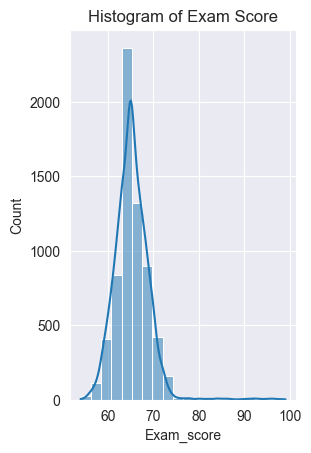

In [365]:
plt.subplot(1,2,2)
sns.histplot(merged_student_data1_df["Exam_score"],kde=True,bins=20)
plt.title("Histogram of Exam Score")

In [366]:
correlation,p_value =  stats.spearmanr(merged_student_data1_df["Exam_score"],merged_student_data1_df["Sleep_hours"])
print(correlation)
print(p_value)

-0.002832310100463068
0.8179543488821751


I got the p-value greater than 0.05, indicating that there is no significant relationship between the sleep hours and exam score. We fail to reject the null hypothesis.

'Hypothesis 2: Students with Internet access (Internet_Access) spend more time studying (Hours_Studied) than students without Internet access.
- Create a boxplot for visualization and check for outliers.
- Remove extreme values according to boxplot definition.

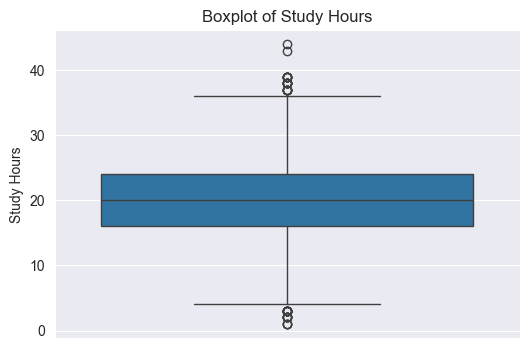

In [367]:
plt.figure(figsize=(6,4))
sns.boxplot(y=merged_student_data1_df["Hours_studied"])
plt.title("Boxplot of Study Hours")
plt.ylabel("Study Hours")
plt.show()

In [303]:
merged_student_data1_df.columns

Index(['Student_ID', 'Hours_studied', 'Attendance', 'Sleep_hours',
       'Parental_Support', 'Resources_access', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Exam_score', 'Parental_Education', 'Distance_from_Home', 'Gender'],
      dtype='object')

In [368]:
import pandas as pd

# Assuming 'study_hours' is your column name
Q1 = merged_student_data1_df['Hours_studied'].quantile(0.25)
Q3 = merged_student_data1_df['Hours_studied'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [370]:
merged_student_data_df= [(merged_student_data1_df["Hours_studied"] >= lower_bound) & (merged_student_data1_df["Hours_studied"] <= upper_bound)]

In [371]:
#group_with_internet = merged_student_data_df[merged_student_data_df["Internet_Access"]=="Available"]["Hours_studied"]
group_with_internet = merged_student_data1_df[merged_student_data1_df["Internet_Access"] == "Available"]["Hours_studied"]


In [372]:
group_without_internet = merged_student_data1_df[merged_student_data1_df["Internet_Access"]=="Unavailable"]["Hours_studied"]

In [373]:
t_stat, p_value = stats.ttest_ind(group_with_internet, group_without_internet)
print(f"T-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")



T-statistic: 0.354
p-value: 0.724


In the second hypothesis we got the p-value greater than 0.05. So we fail to reject null hypothesis indicating that there is no comparable differences between the groups

Hypothesis 3: Students who receive tutoring (Tutoring_Sessions) have higher exam grades than students without tutoring.

In [375]:
group_with_tutoringsessions = merged_student_data1_df[merged_student_data1_df["Tutoring_Sessions"] > 0]["Exam_score"]
group_without_tutoringsessions = merged_student_data1_df[merged_student_data1_df["Tutoring_Sessions"] == 0]["Exam_score"]

In [376]:
t_stat, p_value = stats.ttest_ind(group_with_tutoringsessions,group_without_tutoringsessions,equal_var=False)
print(f"T-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

T-statistic: 6.960
p-value: 0.000


Here we got significant P-value,indicating that groups with tutoring sessions scored high scores compared with group without tutoring sessions